# Data wrangle project

# Introduction


Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

*The goal of this project is to wrangle data from [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) Twitter's account using Python and document the whole process in a Jupyter Notebook  named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.*


# Project Details

Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum) needed to be assessed and cleaned.The tasks for this project were:

* Data wrangling, which consists of:
  * Gathering data
  * Assessing data
  * Cleaning data
* Storing, analyzing, and visualizing our wrangled data
* Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

## Gathering Data for this Project

### Enhanced Twitter Archive

The WeRateDogs Twitter archive provided by Udacity. This contains basic tweet data for all 5000+ of their tweets, but not everything.I manually downloaded this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

### Image Predictions File
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: [image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### Additional Data via the Twitter API

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.


## Key Points

Key points to keep in mind when data wrangling for this project:

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Acceptance Criterion 

* Assessing Data for this Project
  * Detect and document at least eight (8) quality issues 
  * Two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
  
* Cleaning Data for this Project
  * Clean each of the issues you documented while assessing. 
  * The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).
  
* Storing, Analyzing, and Visualizing Data for this Project
  * Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. 
  * If additional files exist because multiple tables are required for tidiness, name these files appropriately.
  * Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

* Analyze and visualize your wrangled data.
  * At least three (3) insights and
  * one (1) visualization must be produced

* Reporting for this Project
  * Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

  * Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.


## Gather :-

In [1]:
# imprt libraries.  
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import requests
import re
import json
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# read csv as a Pandas DataFrame
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [38]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

# using tweepy library
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# list of tweet ids from enhanced data set
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_notify=True, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [4]:
# Using requests library to download tsv file hosted on udacity server

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split("/")[-1]
r = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name , 'wb') as f:
        f.write(r.content)

In [5]:
image_predictions_df = pd.read_csv(file_name , sep = "\t")

In [6]:
# creating empty list to append 'tweet_json.txt' file in it
df_list = []
# reading 'tweet_json.txt' file line by line and name columns 
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,7453,35276,8914931
1,892177421306343426,5536,30533,8914931
2,891815181378084864,3661,22980,8914931
3,891689557279858688,7614,38546,8914931
4,891327558926688256,8219,36834,8914931
...,...,...,...,...
2326,666049248165822465,39,95,8914913
2327,666044226329800704,124,262,8914913
2328,666033412701032449,39,108,8914913
2329,666029285002620928,41,118,8914913


## Assess :-

### Quality :

#### image_predictions_df :-
- Columns names not clear and need to rename __#1__
- delete tweets without images __#2__
- delete retweeted rows __#3__
- delete inreply tweets __#4__
- Change "timestamp" Dtype __#6__
- clean source column __#7__
- "rating_denominator" column not all = 10 __#8__
- low predection rows after merge __#11__
- nan values in 'doggo', 'floofer', 'pupper' and 'puppo' columns __#12__

### Tidenesss :-
- merge "df_archive", "df_archive" and "image_predictions_df" in one DataFrame __#2__
- delete null columns [ "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"] __#5__
- "confidence , predection and breed" have more than one column __#9__
- 'prediction_level' column is useless after merge __#10__
-  merge "doggo", "floofer", "pupper" and "puppo" in one column named "life_stage" __#13__



In [10]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   user_count      2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,2617.525955,7373.325182,8.914958e+06
std,6.823170e+16,4429.017252,11450.516639,2.839497e+01
min,6.660209e+17,1.000000,0.000000,8.914904e+06
25%,6.782670e+17,530.000000,1281.500000,8.914941e+06
50%,7.182469e+17,1222.000000,3198.000000,8.914956e+06
75%,7.986692e+17,3040.500000,9027.000000,8.914981e+06
max,8.924206e+17,75215.000000,152037.000000,8.915003e+06


In [15]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Clean

In [16]:
# copy the original data frames
image_predictions_df_clean = image_predictions_df.copy()

In [17]:
df_archive_clean = df_archive.copy()

In [18]:
api_df_clean = api_df.copy()

## image_predictions_df_clean :-

## Define:- 
rename columns names to the full name of each column

## Code :- 

In [19]:
# rename columns
new_columns = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df_clean.columns = new_columns

## Test

In [20]:
image_predictions_df_clean

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Define :-
merge all data frame in one dataframe "df_archive_clean" first merge "df_archive_clean" with "api_df_clean" then merge them with 'image_predictions_df_clean'

## Code :-

In [21]:
# merge df_archive_clean with api_df_clean
df_archive_clean = pd.merge(left = df_archive_clean , right = api_df_clean, left_on = "tweet_id", right_on = "tweet_id", how = "inner")

In [22]:
# merge df_archive_clean with image_predictions_df_clean
df_archive_clean = pd.merge(left = df_archive_clean , right = image_predictions_df_clean, right_on = "tweet_id", left_on = "tweet_id",how = "inner")

## Test :-

In [23]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2055,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2056,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2057,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Define :-
delete retweeted rows using "retweeted_status_id" column

## Code

In [24]:
# Delete retweets 
df_archive_clean = df_archive_clean[df_archive_clean["retweeted_status_id"].isnull()]

## Test :-

In [25]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2055,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2056,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2057,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Define:-
delete inreply tweets using "in_reply_to_status_id"

## Code :-

In [26]:
# Delete in replies
df_archive_clean = df_archive_clean[df_archive_clean["in_reply_to_status_id"].isnull()]

## Test:-

In [27]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1964 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1964 non-null   object 
 4   source                      1964 non-null   object 
 5   text                        1964 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1964 non-null   object 
 10  rating_numerator            1964 non-null   int64  
 11  rating_denominator          1964 non-null   int64  
 12  name                        1964 non-null   object 
 13  doggo                       1964 

## Define :-
delete null columns [ "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]

## Code :-

In [28]:
# Delete empty columns
null_list =  [ "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
df_archive_clean = df_archive_clean.drop(null_list, axis = 1)

# Test :-

In [29]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
1128,703079050210877440,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,https://twitter.com/dog_rates/status/703079050...,11,10,a,None,None,...,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
1078,707377100785885184,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,...,1,golden_retriever,0.637225,True,bloodhound,0.094542,True,cocker_spaniel,0.069797,True
1743,671735591348891648,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,None,None,...,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
1373,684097758874210310,2016-01-04 19:43:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,None,None,...,1,Labrador_retriever,0.627856,True,German_short-haired_pointer,0.173675,True,Chesapeake_Bay_retriever,0.041342,True
122,863062471531167744,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,...,2,French_bulldog,0.935804,True,pug,0.059576,True,boxer,0.001412,True


## Define :-
Change "timestamp" Dtype from str. to timestamp

## Code :-

In [30]:
# change "timestamp" Dtype
df_archive_clean["timestamp"] = pd.to_datetime(df_archive_clean["timestamp"])

## Test :-

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   int64              
 1   timestamp           1964 non-null   datetime64[ns, UTC]
 2   source              1964 non-null   object             
 3   text                1964 non-null   object             
 4   expanded_urls       1964 non-null   object             
 5   rating_numerator    1964 non-null   int64              
 6   rating_denominator  1964 non-null   int64              
 7   name                1964 non-null   object             
 8   doggo               1964 non-null   object             
 9   floofer             1964 non-null   object             
 10  pupper              1964 non-null   object             
 11  puppo               1964 non-null   object             
 12  retweet_count       1964 non-null 

In [32]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2055,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2056,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2057,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Define :-
clean source column extract source frome the text

## Code :- 

In [33]:
# Extract the source of tweet from source column
df_archive_clean["source"]= df_archive_clean["source"].apply(lambda x: re.findall(r'>(.*)<', x)[0])

## Test :-

In [34]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2055,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2056,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2057,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Define :-
set all "rating_denominator" column to 10.

## Code :-

In [35]:
# Change "rating_denominator" values
df_archive_clean.loc[: , "rating_denominator"] = int(10)

## Test :-

In [36]:
df_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,img_num,confidence_1,confidence_2,confidence_3
count,1.964000e+03,1964.000000,1964.0,1964.000000,1964.000000,1.964000e+03,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.358154e+17,12.223014,10.0,2392.772403,8117.741344,8.914958e+06,1.202138,0.593928,1.346393e-01,6.028936e-02
std,6.744191e+16,41.708155,0.0,4276.827981,11938.978155,2.967661e+01,0.559615,0.272134,1.009430e-01,5.096697e-02
min,6.660209e+17,0.000000,10.0,11.000000,69.000000,8.914904e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758399e+17,10.000000,10.0,533.000000,1739.500000,8.914938e+06,1.000000,0.362775,5.352722e-02,1.619708e-02
50%,7.087246e+17,11.000000,10.0,1159.000000,3665.000000,8.914971e+06,1.000000,0.587357,1.173995e-01,4.947920e-02
75%,7.877408e+17,12.000000,10.0,2729.750000,10129.250000,8.914982e+06,1.000000,0.847062,1.955618e-01,9.162278e-02
max,8.924206e+17,1776.000000,10.0,75215.000000,152037.000000,8.915003e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


## Define :-
merge all "confidence , predection and breed" to one column for each.

## code :-

In [37]:
# Merge columns
df_archive_clean = pd.wide_to_long(df_archive_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id','timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count', 'user_count','jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

## Test :-

In [38]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,None,7453,35276,8914931,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,None,7453,35276,8914931,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,None,7453,35276,8914931,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,3,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,None,5536,30533,8914931,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,None,5536,30533,8914931,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,None,41,118,8914913,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5888,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,None,41,118,8914913,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
5889,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,...,None,446,2356,8914913,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
5890,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,...,None,446,2356,8914913,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True


## Define :-
drop low predection rows for each tweet

## Code :-

In [39]:
#Delete column
df_archive_clean = df_archive_clean[df_archive_clean['prediction_level'] == 1]

## Test :-

In [40]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
2592,726224900189511680,2016-04-30 01:41:23+00:00,Twitter for iPhone,I'm getting super heckin frustrated with you a...,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,...,None,1099,4280,8914975,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,1,1,standard_poodle,0.261112,True
2847,711694788429553666,2016-03-20 23:23:54+00:00,Twitter for iPhone,Oh. My. God. 13/10 magical af https://t.co/Ezu...,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,...,None,17673,31795,8914978,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,1,brown_bear,0.713293,False
3027,706681918348251136,2016-03-07 03:24:33+00:00,Twitter for iPhone,Say hello to Katie. She's a Mitsubishi Hufflep...,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,...,None,942,3195,8914979,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,1,toy_poodle,0.717584,True
5484,668528771708952576,2015-11-22 20:37:34+00:00,Twitter for iPhone,This is Gòrdón. He enjoys his razberrita by po...,https://twitter.com/dog_rates/status/668528771...,12,10,Gòrdón,None,None,...,None,204,433,8914909,https://pbs.twimg.com/media/CUcXXpxWUAAUJ__.jpg,1,1,Labrador_retriever,0.195835,True
4323,676864501615042560,2015-12-15 20:40:47+00:00,Twitter for iPhone,Meet Ash. He's just a head now. Lost his body ...,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,...,None,667,1994,8915002,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,1,Chesapeake_Bay_retriever,0.371146,True


## Define :-
drop 'prediction_level' column

## Code :-

In [41]:
# Delete column
df_archive_clean.drop(columns = 'prediction_level', inplace = True)

## Test :-

In [42]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 5889
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   int64              
 1   timestamp           1964 non-null   datetime64[ns, UTC]
 2   source              1964 non-null   object             
 3   text                1964 non-null   object             
 4   expanded_urls       1964 non-null   object             
 5   rating_numerator    1964 non-null   int64              
 6   rating_denominator  1964 non-null   int64              
 7   name                1964 non-null   object             
 8   doggo               1964 non-null   object             
 9   floofer             1964 non-null   object             
 10  pupper              1964 non-null   object             
 11  puppo               1964 non-null   object             
 12  retweet_count       1964 non-null 

## Define :-
delete nan value from 'doggo', 'floofer', 'pupper' and 'puppo' columns

## Code :-

In [45]:
# Delete NAN values
df_archive_clean["doggo"] = df_archive_clean["doggo"].replace("None" , "")
df_archive_clean["pupper"] = df_archive_clean["pupper"].replace("None" , "")
df_archive_clean["puppo"] = df_archive_clean["puppo"].replace("None" , "")
df_archive_clean["floofer"] = df_archive_clean["floofer"].replace("None" , "")

## Test :-

In [46]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed
45,889278841981685760,2017-07-24 00:19:32+00:00,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,,,,,4700,23052,8914931,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True
2910,709519240576036864,2016-03-14 23:19:03+00:00,Twitter for iPhone,This is Vince. He's a Gregorian Flapjeck. Whit...,https://twitter.com/dog_rates/status/709519240...,9,10,Vince,,,,,227,1447,8914978,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,cocker_spaniel,0.414982,True
1173,808001312164028416,2016-12-11 17:31:39+00:00,Twitter for iPhone,This is Cooper. He likes to stick his tongue o...,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,,,,,3509,12453,8914945,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,0.730959,True
4869,672267570918129665,2015-12-03 04:14:13+00:00,Twitter for iPhone,When you accidentally open up the front facing...,https://twitter.com/dog_rates/status/672267570...,10,10,None,,,,,566,1391,8915003,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True
4065,680440374763077632,2015-12-25 17:30:01+00:00,Twitter for iPhone,Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11,10,None,,,,,482,1407,8914986,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False


## Define :-
merge the four columns in one column named "life_stage" and then drop another column result from melt function

## Code :-

In [47]:
# Merge columns
df_archive_clean = pd.melt(df_archive_clean, id_vars = ['tweet_id','timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'user_count','jpg_url', 'img_num','prediction','confidence', 'breed'], value_vars = [ 'doggo', 'floofer', 'pupper', 'puppo'], var_name = 'stages', value_name = 'life_stage')
df_archive_clean = df_archive_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

In [48]:
df_archive_clean.drop(columns = 'stages', inplace = True)

## Test :-

In [49]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed,life_stage
1887,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,79,284,8914909,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,
1886,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,214,418,8914909,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,
1885,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,533,723,8914909,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,
1884,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,81,291,8914909,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,
1883,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,56,179,8914909,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,787717603741622272,2016-10-16 18:11:26+00:00,Twitter for iPhone,This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,2748,10199,8914952,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3,German_shepherd,0.992339,True,puppo
6297,803773340896923648,2016-11-30 01:31:12+00:00,Twitter for iPhone,This is Diogi. He fell in the pool as soon as ...,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,2718,9995,8914947,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,puppo
5970,874012996292530176,2017-06-11 21:18:31+00:00,Twitter for iPhone,This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,9078,31444,8914935,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,puppo
5996,867421006826221569,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,2253,14944,8914938,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,puppo


# Storing, Analyzing, and Visualizing Data :-

In [50]:
# Store cleaned DataFrame
df_archive_clean.to_csv( 'twitter_archive_master.csv',index=False)

In [51]:
# Read new csv file by pandas
df_archive_master = pd.read_csv('twitter_archive_master.csv')

In [52]:
# analyze the max. "retweet_count" tweet
df_archive_master[df_archive_master["retweet_count"] == df_archive_master["retweet_count"].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed,life_stage
1692,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,75215,152037,8914974,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,doggo


In [26]:
# analyze the min. "retweet_count" tweet
df_archive_master[df_archive_master["favorite_count"] == df_archive_master["favorite_count"].min()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed,life_stage
79,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,11,69,8914911,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,NaN


(-1.2883360670047606,
 1.2315401199357523,
 -1.2394761862539603,
 1.2110410592522207)

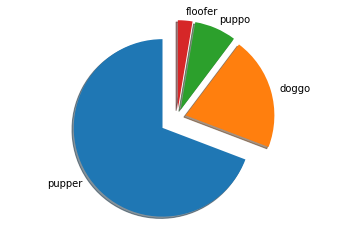

In [131]:
# Get the life stafe count for each
pupper_counts = df_archive_master["life_stage"].value_counts()["pupper"]
doggo_counts = df_archive_master["life_stage"].value_counts()["doggo"]
puppo_counts = df_archive_master["life_stage"].value_counts()["puppo"]
floofer_counts = df_archive_master["life_stage"].value_counts()["floofer"]
life_stage_count = [pupper_counts, doggo_counts, puppo_counts, floofer_counts]
life_stages = ["pupper", "doggo", "puppo", "floofer"]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Analyses
- Dogs in __Pupper__ stage of dog life cycle get most tweets, which is expected.

Text(0.5, 1.0, 'Correlation Heat Map')

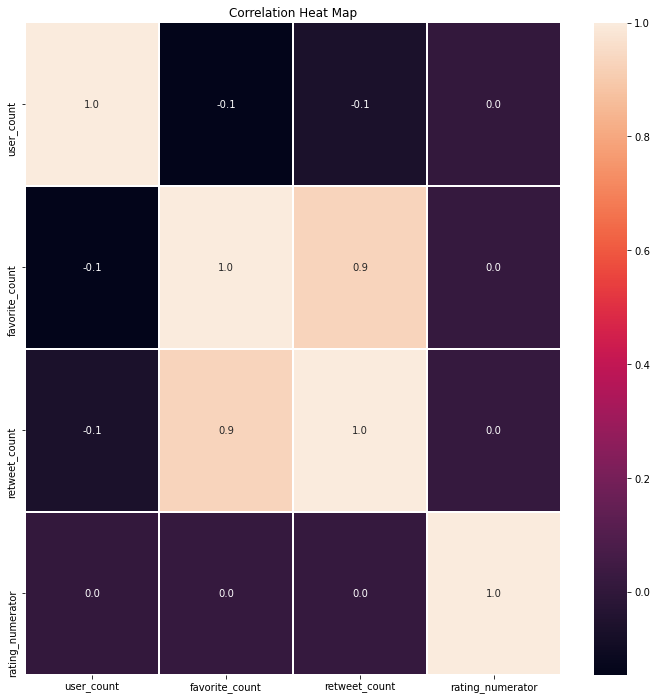

In [130]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_archive_master[['source','user_count','favorite_count','retweet_count',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

### Analyses
- Strong correlation between favorites and retweets, this is expected.
- Negative correlation between user followers and retweets, this is not expected.

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

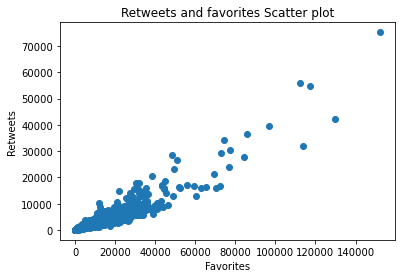

In [128]:
# make scatter plot 
plt.scatter(df_archive_master['favorite_count'], df_archive_master['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### Analyses
- As expected there is a big positive (+0.9; shown by correlation heat map) correlation between the retweets and favorites.

# END OF PROJECT